## Basic Statistics
Performing some basic statistics on the dataset to get a better understanding of it.

In [3]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/assignment_rev2.csv")
columns = dataset.columns

In [ ]:
dataset.head(5)

In [ ]:
print('Shape of Dataset:', dataset.shape)

Shape of Dataset: (15447, 56)


In [ ]:
dataset.dtypes

In [ ]:
# check how many entries are empty in a specific column
dataset.isnull().sum()

id                         0
ranking_score              0
agent_id                   0
geography_name             0
sq_meters                  0
price                      0
year_of_construction       0
floor                      0
subtype                    0
rooms                      0
no_of_bathrooms            0
no_of_wc                   0
ad_type                    0
living_rooms               0
kitchens                   0
balcony_area               0
lux_home                4046
new_development         3383
garage                  1507
furnished               3942
preserved               5171
investment              4711
unfinished              5152
heating_under_floor     4418
renovated               4094
requires_renovation     4621
airy                    3315
bright                  2983
painted                 4233
garden                  2697
ac                      2593
storage                 1777
balcony                 2026
internal_stairs         4683
view          

In [ ]:
# count the number of duplicate entries while excluding the unique id and the agent_id
dataset[dataset.columns.difference(['id', 'agent_id'])].duplicated().sum()

0

In [ ]:
dataset.describe()

,id,ranking_score,agent_id,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,renovation_year,no_of_wc,living_rooms,kitchens,balcony_area,equipped
count,1.461400e+04,14614.000000,14614.000000,14614.000000,1.461400e+04,14614.000000,14614.000000,14614.000000,1971.000000,14614.000000,14614.000000,14614.000000,14614.000000,0.0
mean,4.130462e+07,117.680580,11535.098809,201.095456,5.749287e+05,1955.101136,2.917613,1.664568,2011.886352,0.642261,0.560832,0.601341,5.235117,NaN
std,2.110076e+06,31.516233,3162.380219,1170.774081,6.890673e+05,291.598095,2.683195,1.296725,7.880856,0.773179,1.034723,0.698093,22.967390,NaN
min,3.464630e+07,18.000000,5976.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.046094e+07,95.325000,9237.000000,88.000000,2.300000e+05,1976.000000,2.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,4.211492e+07,122.200000,11210.000000,135.000000,3.850000e+05,1997.000000,3.000000,1.000000,2014.000000,1.000000,0.000000,1.000000,0.000000,NaN
75%,4.283103e+07,143.000000,13445.000000,240.000000,6.800000e+05,2010.000000,4.000000,2.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,NaN
max,4.346410e+07,182.800000,20017.000000,140000.000000,2.500000e+07,2155.000000,255.000000,21.000000,2019.000000,22.000000,60.000000,11.000000,400.000000,NaN


In [ ]:
# get number of unique values per column
dataset.nunique()

id                      14614
ranking_score            1405
agent_id                  567
geography_name              4
sq_meters                 566
price                     579
year_of_construction      105
floor                      15
subtype                    10
rooms                      27
no_of_bathrooms            18
no_of_wc                   14
ad_type                     4
living_rooms               15
kitchens                   10
balcony_area               82
lux_home                    2
new_development             2
garage                      2
furnished                   2
preserved                   2
investment                  2
unfinished                  2
heating_under_floor         2
renovated                   2
requires_renovation         2
airy                        2
bright                      2
painted                     2
garden                      2
ac                          2
storage                     2
balcony                     2
internal_s

In [ ]:
# print(dataset.isnull().sum())
null_percentage = dataset.isnull().sum() / len(dataset) * 100
# create a list of columns with more than 80% null values
columns_to_drop = null_percentage[null_percentage > 80].index.tolist()
# drop the columns with more than 80% null values
dataset.drop(columns_to_drop, axis=1, inplace=True)
# drop rows where data is missing from specific columns
dataset.dropna(subset=columns[0:10].append(columns[13:18]), inplace=True)

In [ ]:
dataset.iloc[7378]

id                          34814530
ranking_score                   85.9
agent_id                      9526.0
geography_name          northern sub
sq_meters                        335
price                         850000
year_of_construction            2008
floor                   ground-floor
subtype                   maisonette
rooms                              3
no_of_bathrooms                    3
no_of_wc                           1
ad_type                       simple
living_rooms                       0
kitchens                           0
balcony_area                       0
lux_home                         NaN
new_development                 True
garage                          True
furnished                        NaN
preserved                        NaN
investment                       NaN
unfinished                       NaN
heating_under_floor              NaN
renovated                        NaN
requires_renovation              NaN
airy                             NaN
b

In [ ]:
dataset[dataset.columns.difference(['id', 'agent_id', 'ranking_score'])].select_dtypes(include=np.number)

,balcony_area,kitchens,living_rooms,no_of_bathrooms,no_of_wc,price,rooms,sq_meters,year_of_construction
0,0,0,0,0,0,200000,4,567,2005
1,0,1,1,4,1,550000,5,642,1992
2,0,0,0,2,1,500000,2,320,2009
3,0,1,0,1,1,230000,3,95,2007
4,0,1,0,1,2,370000,4,195,2007
...,...,...,...,...,...,...,...,...,...
15442,0,0,0,0,0,75000,2,80,1960
15443,0,0,0,0,0,70000,2,69,1975
15444,0,0,0,1,0,120000,1,75,1974
15445,0,0,0,0,0,600000,1,800,1930


In [ ]:
dataset.select_dtypes(include=np.number)

,id,ranking_score,agent_id,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,no_of_wc,living_rooms,kitchens,balcony_area
0,42911697,47.0,14680.0,567,200000,2005,4,0,0,0,0,0
1,43018583,134.7,15502.0,642,550000,1992,5,4,1,1,1,0
2,39670968,71.0,9807.0,320,500000,2009,2,2,1,0,0,0
3,39740833,122.0,14682.0,95,230000,2007,3,1,1,0,1,0
4,39742998,126.7,14682.0,195,370000,2007,4,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15442,43079210,101.0,19009.0,80,75000,1960,2,0,0,0,0,0
15443,43079212,103.5,19009.0,69,70000,1975,2,0,0,0,0,0
15444,43079508,118.1,6976.0,75,120000,1974,1,1,0,0,0,0
15445,40498665,78.7,7354.0,800,600000,1930,1,0,0,0,0,0


In [ ]:
dataset.drop([262])

KeyError: ignored

In [ ]:
# define a threshold for z-score
threshold = 3

# loop through each numeric column
for col in dataset.select_dtypes(include=np.number):
    print(col)
    # calculate z-score for each value in the column
    z = np.abs(stats.zscore(dataset[col]))
    # identify outliers based on the threshold
    outliers = list(np.where(z > threshold))
    # drop rows containing outliers
    dataset.drop(outliers[0], axis=0, inplace=True)

# save the cleaned dataset
# dataset.to_csv('cleaned.csv', index=False)

id
28
72
75
76
227
246
262
264
786
827
1260
1268
1277
1278
1279
1304
1306
1309
2704
2894
2998
5383
5410
5611
5644
5646
5664
5892
5935
6084
6188
6190
6194
6195
6900
7378
8477
9285
9939
9940
10987
11019
11038
11270
11273
11274
11275
11277
11278
11281
12149
12166
14053
14093


KeyError: ignored

In [ ]:
dataset.describe()

In [ ]:
dataset['subtype'].value_counts()

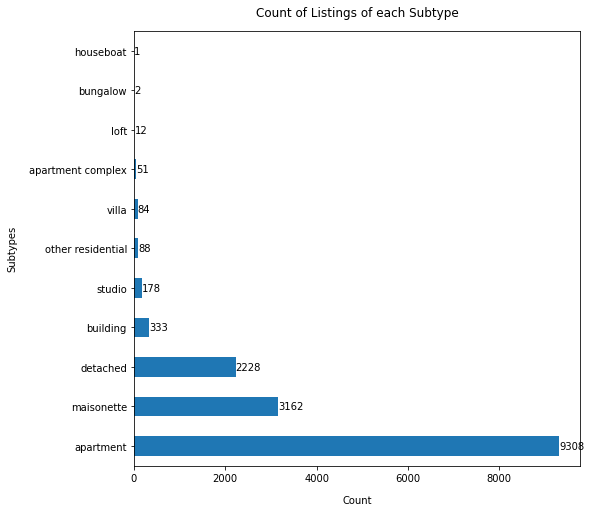

In [ ]:
# bar chart of counts for subtypes of houses
ax = dataset['subtype'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Subtypes", labelpad=12)
plt.title("Count of Listings of each Subtype", y=1.02);

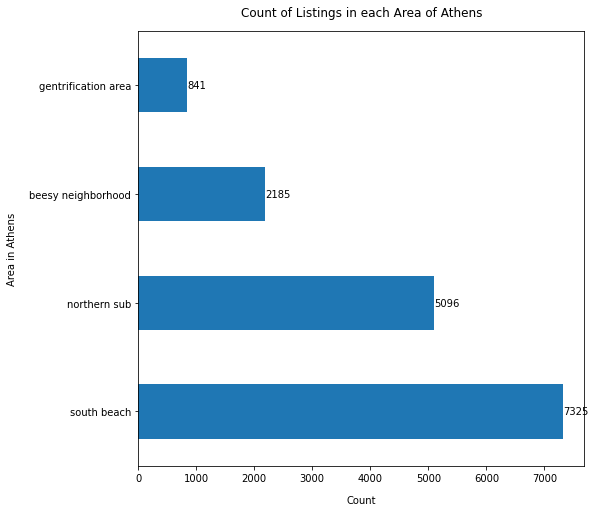

In [ ]:
# bar chart of counts for subtypes of houses
ax = dataset['geography_name'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Area in Athens", labelpad=12)
plt.title("Count of Listings in each Area of Athens", y=1.02);

In [ ]:
# create a new column with decade information
decade = pd.cut(dataset['year_of_construction'], bins=range(int(dataset['year_of_construction'].min()), int(dataset['year_of_construction'].max()), 10), labels=[f"{i}s" for i in range(int(dataset['year_of_construction'].min()), 2150, 10)])

# # group by decade and count the number of rows in each group
# grouped_df = df.groupby('decade').size().reset_index(name='count')

# print(grouped_df)

In [ ]:
# scatter plot for two numerical variables
plt.scatter(df['column_name1'], df['column_name2'])

In [ ]:
# drop columns with high null values or low variance
df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

# fill null values with mean or mode
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# create dummy variables for categorical columns
df = pd.get_dummies(df, columns=['column_name'])

# scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['column_name1', 'column_name2']] = scaler.fit_transform(df[['column_name1', 'column_name2']])